## IMPORTING THE DATA

In [1]:
import pandas as pd

RATINGS_PATH = "ratings.csv"

ratings = pd.read_csv(
    RATINGS_PATH,
    dtype={
        "userId": "int32",
        "movieId": "int32",
        "rating": "float32",
        "timestamp": "int64"
    }
)

ratings.describe()


,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


In [2]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int64  
dtypes: float32(1), int32(2), int64(1)
memory usage: 610.4 MB


In [4]:
MOVIES_PATH = "movies.csv"

movies = pd.read_csv(
    MOVIES_PATH,
    dtype={
        "movieId": "int32",
        "title": "string",
        "genres": "string"
    }
)

movies.info()
LINKS_PATH = "links.csv"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int32 
 1   title    87585 non-null  string
 2   genres   87585 non-null  string
dtypes: int32(1), string(2)
memory usage: 1.7 MB


In [5]:
links = pd.read_csv(
    LINKS_PATH,
    dtype={
        "movieId": "int32",
        "imdbId": "string",
        "tmdbId": "Int64"  
    }
)

links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int32 
 1   imdbId   87585 non-null  string
 2   tmdbId   87461 non-null  Int64 
dtypes: Int64(1), int32(1), string(1)
memory usage: 1.8 MB


In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,0114709,862
1,2,0113497,8844
2,3,0113228,15602
3,4,0114885,31357
4,5,0113041,11862


In [7]:
TMDB_PATH = "TMDB  IMDB Movies Dataset.csv"

tmdb = pd.read_csv(TMDB_PATH)

tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434908 entries, 0 to 434907
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    434908 non-null  int64  
 1   title                 434908 non-null  object 
 2   vote_average          434908 non-null  float64
 3   vote_count            434908 non-null  int64  
 4   status                434908 non-null  object 
 5   release_date          414317 non-null  object 
 6   revenue               434908 non-null  int64  
 7   runtime               434908 non-null  int64  
 8   adult                 434908 non-null  bool   
 9   backdrop_path         184885 non-null  object 
 10  budget                434908 non-null  int64  
 11  homepage              54539 non-null   object 
 12  tconst                434908 non-null  object 
 13  original_language     434908 non-null  object 
 14  original_title        434908 non-null  object 
 15  

## EDA

In [8]:
ratings["rating"].describe()
invalid = ratings[
    (ratings["rating"] < 0.5) | (ratings["rating"] > 5.0)
]

len(invalid)


0

In [9]:
ratings.movieId.nunique(), movies.movieId.nunique()
orphan_movie_ids = set(ratings.movieId) - set(movies.movieId)
len(orphan_movie_ids)


0

In [10]:
links["imdbId"].head()


0    0114709
1    0113497
2    0113228
3    0114885
4    0113041
Name: imdbId, dtype: string

In [11]:
ratings["rating"].value_counts(normalize=True).sort_index()

rating
0.5    0.016410
1.0    0.029583
1.5    0.016596
2.0    0.063394
2.5    0.052668
3.0    0.189217
3.5    0.134065
4.0    0.261488
4.5    0.092937
5.0    0.143642
Name: proportion, dtype: float64

In [12]:
tmdb["overview"].isna().count()


434908

In [13]:
tmdb["genres"].isna().count()


434908

## DATA CLEANING

In [14]:
tmdb["id"]

0          27205
1         157336
2            155
3          19995
4          24428
           ...  
434903    875816
434904    875836
434905    875781
434906    875799
434907    875801
Name: id, Length: 434908, dtype: int64

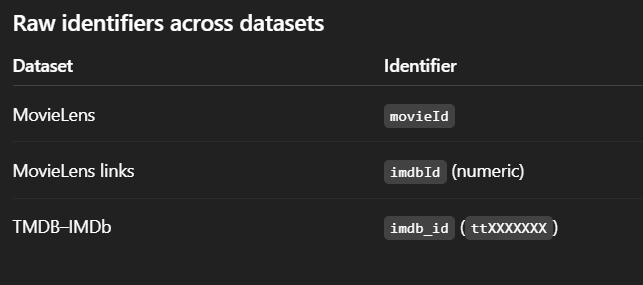

In [15]:
# Normalize IMDb IDs in MovieLens links by adding tt to the start to make it 
# consistent with the tmdb dataset
links["imdb_id"] = "tt" + links["imdbId"].str.zfill(7)

links[["imdbId", "imdb_id"]].head()


,imdbId,imdb_id
0,0114709,tt0114709
1,0113497,tt0113497
2,0113228,tt0113228
3,0114885,tt0114885
4,0113041,tt0113041


In [16]:
links["imdb_id"].isna().mean()

0.0

In [17]:
links["imdb_id"].nunique(), links.shape[0]

(87585, 87585)

In [18]:
tmdb['tconst'].head()

0    tt1375666
1    tt0816692
2    tt0468569
3    tt0499549
4    tt0848228
Name: tconst, dtype: object

In [19]:
movies_enriched = (
    movies
    .merge(
        links[["movieId", "imdb_id", "tmdbId"]],
        on="movieId",
        how="left"
    )
    .merge(
        tmdb,
        left_on="imdb_id",
        right_on="tconst",
        how="left"
    )
)


In [20]:
movies_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88650 entries, 0 to 88649
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               88650 non-null  int32  
 1   title_x               88650 non-null  string 
 2   genres_x              88650 non-null  string 
 3   imdb_id               88650 non-null  object 
 4   tmdbId                88526 non-null  Int64  
 5   id                    87620 non-null  float64
 6   title_y               87620 non-null  object 
 7   vote_average          87620 non-null  float64
 8   vote_count            87620 non-null  float64
 9   status                87620 non-null  object 
 10  release_date          87041 non-null  object 
 11  revenue               87620 non-null  float64
 12  runtime               87620 non-null  float64
 13  adult                 87620 non-null  object 
 14  backdrop_path         70792 non-null  object 
 15  budget             

In [21]:
overview_coverage = movies_enriched["overview"].notna().mean()
genres_coverage = movies_enriched["genres_y"].notna().mean()

overview_coverage, genres_coverage



(0.9754314720812183, 0.9635871404399323)

In [22]:
# using the fall back method to make sure movies are not dropped
content_movies = movies_enriched.copy()

# Fill missing TMDB genres with MovieLens genres as a fallback
content_movies["genres_y"] = content_movies["genres_y"].fillna(content_movies["genres_x"])

# Fill missing overviews and other text fields with empty strings
cols_to_fix = ["overview", "directors", "cast", "tagline"]
for col in cols_to_fix:
    content_movies[col] = content_movies[col].fillna("")


In [23]:

content_movies["genres_x"] = content_movies["genres_x"].str.replace("|", ", ", regex=False)

In [24]:
collaborative_movies = movies_enriched[[
    "movieId",
    "title_x"
]].copy()

print("Collaborative view shape:", collaborative_movies.shape)
collaborative_movies.head()


Collaborative view shape: (88650, 2)


,movieId,title_x
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [25]:
content_movies["has_cast"] = content_movies["cast"].notna()
content_movies["has_director"] = content_movies["directors"].notna()


In [26]:
hybrid_movies = content_movies[
    content_movies["movieId"].isin(collaborative_movies["movieId"])
].copy()

print("Hybrid view shape:", hybrid_movies.shape)

hybrid_movies[[
    "movieId",
    "title_x",
    "overview",
    "genres_y",
    "cast",
    "directors"
]].head()


Hybrid view shape: (88650, 36)


,movieId,title_x,overview,genres_y,cast,directors
0,1,Toy Story (1995),"Led by Woody, Andy's toys live happily in his ...","Animation, Adventure, Family, Comedy","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,2,Jumanji (1995),When siblings Judy and Peter discover an encha...,"Adventure, Fantasy, Family","Robin Williams, Kirsten Dunst, Bradley Pierce,...",Joe Johnston
2,3,Grumpier Old Men (1995),A family wedding reignites the ancient feud be...,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,4,Waiting to Exhale (1995),"Cheated on, mistreated and stepped on, the wom...","Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,5,Father of the Bride Part II (1995),Just when George Banks has recovered from his ...,"Comedy, Family","Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [27]:
print("Collaborative movies:", len(collaborative_movies))
print("Content movies:", len(content_movies))
print("Hybrid movies:", len(hybrid_movies))


Collaborative movies: 88650
Content movies: 88650
Hybrid movies: 88650


## FEATURE ENGINEERING

In [28]:
content_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88650 entries, 0 to 88649
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               88650 non-null  int32  
 1   title_x               88650 non-null  string 
 2   genres_x              88650 non-null  string 
 3   imdb_id               88650 non-null  object 
 4   tmdbId                88526 non-null  Int64  
 5   id                    87620 non-null  float64
 6   title_y               87620 non-null  object 
 7   vote_average          87620 non-null  float64
 8   vote_count            87620 non-null  float64
 9   status                87620 non-null  object 
 10  release_date          87041 non-null  object 
 11  revenue               87620 non-null  float64
 12  runtime               87620 non-null  float64
 13  adult                 87620 non-null  object 
 14  backdrop_path         70792 non-null  object 
 15  budget             

In [29]:
import re
def clean_general_text(text):
    """Lowercases, removes punctuation, and strips extra whitespace."""
    if pd.isna(text) or text == "":
        return ""
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text) # Remove special characters
    text = re.sub(r"\s+", " ", text).strip() # Remove duplicate spaces
    return text

def tokenize_metadata(text):
    """Turns names/genres into unique tokens (e.g., 'James Cameron' -> 'jamescameron')."""
    if pd.isna(text) or text == "":
        return ""
    # Standardize delimiters and split
    items = str(text).replace("|", ",").split(",")
    # Remove internal spaces and lowercase to create unique identifiers
    tokens = [item.replace(" ", "").lower().strip() for item in items]
    return " ".join(tokens)

def extract_top_actors(cast_text, top_k=5):
    """Extracts the first K actors and converts them to unique tokens."""
    if pd.isna(cast_text) or cast_text == "":
        return ""
    # Split by standard delimiters and take the top K
    actors = str(cast_text).replace("|", ",").split(",")[:top_k]
    # Tokenize: "Tom Hanks" -> "tomhanks"
    tokenized_actors = [actor.replace(" ", "").lower().strip() for actor in actors]
    return " ".join(tokenized_actors)



# Clean prose text (High word count, used for thematic similarity)
content_movies["overview_clean"] = content_movies["overview"].apply(clean_general_text)
content_movies["title_clean"] = content_movies["title_x"].apply(clean_general_text)

# Tokenize metadata (Low word count, used for precise person/genre matching)
content_movies["genres_tokenized"] = content_movies["genres_y"].apply(tokenize_metadata)
content_movies["directors_tokenized"] = content_movies["directors"].apply(tokenize_metadata)
content_movies["top_actors_tokenized"] = content_movies["cast"].apply(
    lambda x: extract_top_actors(x, top_k=5)
)

print(f"Cleaning complete. Catalog size preserved: {len(content_movies)} movies.")


Cleaning complete. Catalog size preserved: 88650 movies.


In [30]:
def build_weighted_soup(row):
    
    
    soup = (
        str(row['overview_clean']) + " " +
        (str(row['genres_tokenized']) + " ") * 3 +
        (str(row['directors_tokenized']) + " ") * 3 +
        (str(row['top_actors_tokenized']) + " ") * 2 +
        str(row['title_clean'])
    )
    return soup.strip()


content_movies["content_soup"] = content_movies.apply(build_weighted_soup, axis=1)

print("Step 3 Complete: Content 'Soup' successfully built for all movies.")
print(content_movies["content_soup"].iloc[0][:250] + "...")

Step 3 Complete: Content 'Soup' successfully built for all movies.
led by woody andy s toys live happily in his room until andy s birthday brings buzz lightyear onto the scene afraid of losing his place in andy s heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo e...


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=20000, 
    ngram_range=(1, 2),
    min_df=5 
)


tfidf_matrix = tfidf.fit_transform(content_movies['content_soup'])
print(f"Step 4 Complete: TF-IDF Matrix built with shape {tfidf_matrix.shape}")


Step 4 Complete: TF-IDF Matrix built with shape (88650, 20000)


## CONTENT BASED

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
movie_id_to_idx = pd.Series(content_movies.index, index=content_movies['movieId']).to_dict()

def get_content_recommendations(movie_id, top_n=10):
    """
    Finds the most similar movies based on the weighted content soup.
    """
 
    if movie_id not in movie_id_to_idx:
        print(f"Error: Movie ID {movie_id} was either filtered out or doesn't exist.")
        return pd.DataFrame()

    # Find the index for the given movie ID
    idx = movie_id_to_idx[movie_id]

    # Calculate Cosine Similarity between this movie and ALL other movies
    # This compares the direction of the TF-IDF vectors
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

   
    similar_indices = np.argsort(sim_scores)[-(top_n + 1):-1][::-1]

    # Retrieve the metadata and add the scores for visibility
    recommendations = content_movies.iloc[similar_indices].copy()
    recommendations['similarity_score'] = sim_scores[similar_indices]

    # Return the most relevant columns for display
    return recommendations[['movieId', 'title_x', 'genres_y', 'directors', 'similarity_score']]




In [33]:
get_content_recommendations(1, top_n=5)

,movieId,title_x,genres_y,directors,similarity_score
14831,78499,Toy Story 3 (2010),"Animation, Family, Comedy",Lee Unkrich,0.578251
3021,3114,Toy Story 2 (1999),"Animation, Comedy, Family","John Lasseter, Ash Brannon, Lee Unkrich",0.537546
22716,115879,Toy Story Toons: Small Fry (2011),"Animation, Family, Comedy",Angus MacLane,0.453057
22715,115875,Toy Story Toons: Hawaiian Vacation (2011),"Animation, Family, Comedy",Gary Rydstrom,0.382002
69184,220138,Latte and the Magic Waterstone (2019),"Animation, Adventure, Family, Comedy","Paulette Victor Lifton, Mimi Maynard, Regina W...",0.381554


In [34]:
def explain_movie_similarity(movie_id, recommended_id, top_k=5):
    """
    Identifies the specific tokens (keywords, people, genres) that 
    make two movies similar.
    """
    # 1. Get the matrix indices for both movies
    idx1 = movie_id_to_idx.get(movie_id)
    idx2 = movie_id_to_idx.get(recommended_id)
    
    if idx1 is None or idx2 is None:
        return "One or both movie IDs not found in the catalog."

    # 2. Extract the TF-IDF vectors for both movies
    # We convert from sparse matrix to a dense array for calculation
    vec1 = tfidf_matrix[idx1].toarray().flatten()
    vec2 = tfidf_matrix[idx2].toarray().flatten()

    # 3. Find the 'Shared Signal'
    # We take the element-wise minimum of both vectors. 
    # If a word is high in both, it results in a high shared signal.
    shared_signal = np.minimum(vec1, vec2)

    # 4. Map back to actual words
    # Get the feature names (words/tokens) from the vectorizer
    feature_names = tfidf.get_feature_names_out()
    
    # Sort indices by shared signal strength and pick the top K
    top_indices = np.argsort(shared_signal)[-top_k:][::-1]
    
    # Check if there is actually any overlap
    if shared_signal[top_indices[0]] == 0:
        return "No significant shared keywords found."

    # 5. Format and return results
    shared_terms = feature_names[top_indices]
    
    # Display the titles for context
    m1_title = content_movies.loc[content_movies['movieId'] == movie_id, 'title_x'].iloc[0]
    m2_title = content_movies.loc[content_movies['movieId'] == recommended_id, 'title_x'].iloc[0]
    
    print(f"Explanation for similarity between '{m1_title}' and '{m2_title}':")
    print(f"Top shared features: {', '.join(shared_terms)}")
    
    return list(shared_terms)

print("Step 6 Complete: Explanation engine is ready.")


Step 6 Complete: Explanation engine is ready.


In [35]:
# 1. Get recommendations for Toy Story (ID 1)
recs = get_content_recommendations(1, top_n=5)

# 2. Explain the first recommendation (e.g., Toy Story 2 or 3)
top_rec_id = recs.iloc[0]['movieId']
explain_movie_similarity(1, top_rec_id)


Explanation for similarity between 'Toy Story (1995)' and 'Toy Story 3 (2010)':
Top shared features: andy, donrickles, timallen, wallaceshawn, family comedy


['andy', 'donrickles', 'timallen', 'wallaceshawn', 'family comedy']

In [36]:
test_ids = [1, 2571, 589, 1221]

for mid in test_ids:
    print(f"\n--- Testing Movie ID: {mid} ---")
    recs = get_content_recommendations(mid, top_n=3)
    if not recs.empty:
        print(recs[['title_x', 'similarity_score']])
        top_rec = recs.iloc[0]['movieId']
        explain_movie_similarity(mid, top_rec)


--- Testing Movie ID: 1 ---
                                 title_x  similarity_score
14831                 Toy Story 3 (2010)          0.578251
3021                  Toy Story 2 (1999)          0.537546
22716  Toy Story Toons: Small Fry (2011)          0.453057
Explanation for similarity between 'Toy Story (1995)' and 'Toy Story 3 (2010)':
Top shared features: andy, donrickles, timallen, wallaceshawn, family comedy

--- Testing Movie ID: 2571 ---
                                       title_x  similarity_score
47421              The Matrix Revisited (2001)          0.730382
71511     The Matrix Reloaded Revisited (2004)          0.668215
71510  The Matrix Revolutions Revisited (2004)          0.665312
Explanation for similarity between 'Matrix, The (1999)' and 'The Matrix Revisited (2001)':
Top shared features: matrix, annemoss, carrie annemoss, hugoweaving, laurencefishburne

--- Testing Movie ID: 589 ---
                                 title_x  similarity_score
1207              

In [41]:
import os
import json
import joblib
import pandas as pd
import numpy as np
from scipy.sparse import save_npz

# 1. Create directory for website artifacts
ARTIFACT_DIR = "web_artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# 2. Prepare Web-Ready Metadata
# We update genres_y directly: fill nulls with genres_x and replace pipes with commas
# This ensures your website UI (which calls genres_y) is perfectly consistent.
content_movies["genres_y"] = (
    content_movies["genres_y"]
    .fillna(content_movies["genres_x"].str.replace("|", ", ", regex=False))
)

# Select only the columns needed for the website UI and the popularity bias logic
web_columns = [
    'movieId', 
    'title_x', 
    'genres_y', 
    'directors', 
    'poster_path', 
    'popularity'
]

content_movies_web = content_movies[web_columns].copy()

# Ensure posters have a fallback string and popularity is a clean number
content_movies_web['poster_path'] = content_movies_web['poster_path'].fillna("no_poster")
content_movies_web['popularity'] = pd.to_numeric(content_movies_web['popularity'], errors='coerce').fillna(0)

# Save as Parquet (fastest format for Streamlit to load)
content_movies_web.to_parquet(os.path.join(ARTIFACT_DIR, "content_movies.parquet"), index=False)

# 3. Save the Similarity "Brain" (TF-IDF Matrix)
# Using the variable from your notebook's Cell 33
save_npz(os.path.join(ARTIFACT_DIR, "tfidf_matrix.npz"), tfidf_matrix)

# 4. Save the fitted TF-IDF Vectorizer
joblib.dump(tfidf, os.path.join(ARTIFACT_DIR, "tfidf_vectorizer.joblib"))

# 5. Save the Movie ID to Index mapping
# Corrected the NameError from your file: uses 'movie_id_to_index' from Cell 34
with open(os.path.join(ARTIFACT_DIR, "movie_id_to_idx.json"), "w") as f:
    # Convert keys to strings because JSON does not support integer keys
    json_safe_map = {str(k): int(v) for k, v in movie_id_to_idx.items()}
    json.dump(json_safe_map, f)

print(f"✅ Success! Website artifacts saved to '{ARTIFACT_DIR}/'")

✅ Success! Website artifacts saved to 'web_artifacts/'


## COLLABORATIVE

In [38]:
ratings_cf = ratings[["userId", "movieId", "rating"]].copy()

ratings_cf.head()


,userId,movieId,rating
0,1,17,4.0
1,1,25,1.0
2,1,29,2.0
3,1,30,5.0
4,1,32,5.0


In [39]:
ratings_cf_small = ratings_cf.sample(
    n=3_000_000,   # 3 million interactions
    random_state=42
)



In [40]:
from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(
    ratings_cf_small,
    test_size=0.2,
    random_state=42
)


In [41]:
user_ids = ratings_train["userId"].unique()
movie_ids = ratings_train["movieId"].unique()

user_to_index = {u: i for i, u in enumerate(user_ids)}
movie_to_index = {m: i for i, m in enumerate(movie_ids)}

n_users = len(user_to_index)
n_items = len(movie_to_index)

n_users, n_items



(193088, 38446)

In [42]:
ratings_train["user_idx"] = ratings_train["userId"].map(user_to_index)
ratings_train["movie_idx"] = ratings_train["movieId"].map(movie_to_index)

ratings_test["user_idx"] = ratings_test["userId"].map(user_to_index)
ratings_test["movie_idx"] = ratings_test["movieId"].map(movie_to_index)

# Drop test rows with unseen movies
ratings_test = ratings_test.dropna(subset=["movie_idx"]).copy()


KeyboardInterrupt: 

In [ ]:
rating_mean = ratings_train["rating"].mean()

ratings_train["rating_centered"] = ratings_train["rating"] - rating_mean
ratings_test["rating_centered"] = ratings_test["rating"] - rating_mean


In [ ]:
train_data = ratings_train[
    ["user_idx", "movie_idx", "rating_centered"]
].values

test_data = ratings_test[
    ["user_idx", "movie_idx", "rating_centered"]
].values

train_data[:3], train_data.dtype


(array([[ 0.        ,  0.        ,  0.45903754],
        [ 1.        ,  1.        ,  1.45903754],
        [ 2.        ,  2.        , -0.54096246]]),
 dtype('float64'))

In [ ]:
import numpy as np

class MatrixFactorization:
    def __init__(
        self,
        n_users,
        n_items,
        n_factors=50,
        lr=0.005,
        reg=0.05,
        clip=5.0
    ):
        self.lr = lr
        self.reg = reg
        self.clip = clip

        self.user_factors = np.random.normal(
            scale=0.1,
            size=(n_users, n_factors)
        )
        self.item_factors = np.random.normal(
            scale=0.1,
            size=(n_items, n_factors)
        )

    def train(self, data, n_epochs=10):
        for epoch in range(n_epochs):
            np.random.shuffle(data)

            for user_idx, item_idx, rating in data:
                user_idx = int(user_idx)
                item_idx = int(item_idx)

                pred = np.dot(
                    self.user_factors[user_idx],
                    self.item_factors[item_idx]
                )

                err = rating - pred
                err = np.clip(err, -self.clip, self.clip)

                self.user_factors[user_idx] += self.lr * (
                    err * self.item_factors[item_idx]
                    - self.reg * self.user_factors[user_idx]
                )

                self.item_factors[item_idx] += self.lr * (
                    err * self.user_factors[user_idx]
                    - self.reg * self.item_factors[item_idx]
                )

            print(f"Epoch {epoch + 1} completed")



In [ ]:
mf_model = MatrixFactorization(
    n_users=n_users,
    n_items=n_items,
    n_factors=50
)

mf_model.train(train_data, n_epochs=10)


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed


In [ ]:
ratings_test = ratings_test.dropna(
    subset=["user_idx", "movie_idx", "rating_centered"]
).copy()


In [ ]:
test_data = ratings_test[
    ["user_idx", "movie_idx", "rating_centered"]
].values


In [ ]:
def rmse(model, data):
    errors = []

    for user_idx, item_idx, rating in data:
        user_idx = int(user_idx)
        item_idx = int(item_idx)

        pred = np.dot(
            model.user_factors[user_idx],
            model.item_factors[item_idx]
        )
        errors.append((rating - pred) ** 2)

    return np.sqrt(np.mean(errors))


rmse_score = rmse(mf_model, test_data)
rmse_score


1.0542390087720304

In [ ]:
user_embeddings = mf_model.user_factors
movie_embeddings = mf_model.item_factors


In [ ]:
GENRES = [
    "Action", "Comedy", "Drama", "Romance", "Thriller",
    "Sci-Fi", "Horror", "Fantasy", "Animation", "Documentary"
]

STYLES = [
    "Fast-paced", "Emotional", "Dark",
    "Light-hearted", "Thought-provoking"
]
import numpy as np

def encode_onboarding_answers(answers):
    vector = []

    # Genre vector (multi-hot)
    genre_vec = [1 if g in answers["genres"] else 0 for g in GENRES]
    vector.extend(genre_vec)

    # Era (ordinal)
    era_map = {
        "before_1990": 0,
        "1990_2005": 1,
        "2005_2015": 2,
        "after_2015": 3,
        "no_pref": 1.5
    }
    vector.append(era_map[answers["era"]])

    # Popularity preference (0–1)
    vector.append(answers["popularity"])

    # Style vector
    style_vec = [1 if s in answers["styles"] else 0 for s in STYLES]
    vector.extend(style_vec)

    # Exploration
    exploration_map = {
        "safe": 0.0,
        "balanced": 0.5,
        "explore": 1.0
    }
    vector.append(exploration_map[answers["exploration"]])

    return np.array(vector, dtype=np.float32)


In [ ]:
content_movies["release_date"] = pd.to_datetime(
    content_movies["release_date"],
    errors="coerce"
)
content_movies["release_year"] = content_movies["release_date"].dt.year


In [ ]:
# movie_embeddings: (n_movies, 50)
# content_movies contains genres, era, popularity

movie_feature_profiles = {}

for i, row in content_movies.iterrows():
    movie_feature_profiles[row["movieId"]] = {
        "genres": row["genres_y"],
        "year": row["release_year"],
        "popularity": row["popularity"]
    }


In [ ]:
def build_pseudo_user_embedding(
    answers,
    movie_embeddings,
    content_movies,
    movie_to_index
):
    weights = np.zeros(len(movie_embeddings))

    # Weight movies that match preferences
    for movie_id, idx in movie_to_index.items():
        movie = content_movies.loc[
            content_movies["movieId"] == movie_id
        ].iloc[0]

        score = 0

        # Genre match
        for g in answers["genres"]:
            if g.lower() in str(movie["tmdb_genres"]).lower():
                score += 1

        # Popularity alignment
        score += answers["popularity"] * movie["popularity"]

        weights[idx] = score

    # Weighted average in latent space
    pseudo_user = np.average(
        movie_embeddings,
        axis=0,
        weights=weights + 1e-6
    )

    return pseudo_user


In [ ]:
def recommend_for_cold_user(
    pseudo_user,
    movie_embeddings,
    movie_ids,
    top_n=10
):
    scores = movie_embeddings @ pseudo_user
    top_indices = np.argsort(scores)[-top_n:][::-1]
    return [movie_ids[i] for i in top_indices]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
user_embeddings_scaled = scaler.fit_transform(user_embeddings)


In [ ]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 15

kmeans = KMeans(
    n_clusters=NUM_CLUSTERS,
    random_state=42,
    n_init=10
)

user_clusters = kmeans.fit_predict(user_embeddings_scaled)


c:\Users\vtyag\Desktop\AI\movie_recomm\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vtyag\Desktop\AI\movie_recomm\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
cluster_centroids = kmeans.cluster_centers_

In [ ]:
import pandas as pd

user_cluster_df = pd.DataFrame({
    "user_idx": range(len(user_clusters)),
    "cluster_id": user_clusters
})

user_cluster_df.head()


,user_idx,cluster_id
0,0,10
1,1,7
2,2,5
3,3,1
4,4,3


In [ ]:
def top_movies_for_cluster(
    cluster_id,
    cluster_centroids,
    movie_embeddings,
    movie_ids,
    top_n=10
):
    centroid = cluster_centroids[cluster_id]
    scores = movie_embeddings @ centroid
    top_indices = scores.argsort()[-top_n:][::-1]
    return [movie_ids[i] for i in top_indices]


In [ ]:
for c in range(3):
    print(f"Cluster {c}:",
          top_movies_for_cluster(
              c,
              cluster_centroids,
              movie_embeddings,
              list(movie_to_index.keys())
          ))


Cluster 0: [1381, 193, 1445, 63992, 4386, 2720, 2383, 173335, 355, 5419]
Cluster 1: [1381, 2582, 2817, 1707, 38713, 216975, 198033, 147348, 206927, 7919]
Cluster 2: [55577, 810, 162, 1717, 171315, 161558, 26617, 7318, 59615, 194318]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def assign_cluster(pseudo_user, cluster_centroids):
    sims = cosine_similarity(
        pseudo_user.reshape(1, -1),
        cluster_centroids
    )
    return sims.argmax()


In [ ]:
def genre_match_score(movie_genres, user_genres):
    if not isinstance(movie_genres, str):
        return 0
    return sum(
        1 for g in user_genres
        if g.lower() in movie_genres.lower()
    )


In [ ]:
def build_pseudo_user_embedding(
    answers,
    content_movies,
    movie_embeddings,
    movie_to_index
):
    weights = np.zeros(len(movie_embeddings), dtype=np.float32)

    for movie_id, idx in movie_to_index.items():
        movie = content_movies.loc[
            content_movies["movieId"] == movie_id
        ]

        if movie.empty:
            continue

        movie = movie.iloc[0]

        score = 0.0

        # Genre preference
        score += genre_match_score(
            movie.get("tmdb_genres", ""),
            answers["genres"]
        )

        # Popularity preference
        score += answers["popularity"] * float(
            movie.get("popularity", 0)
        )

        weights[idx] = score

    # Avoid division by zero
    weights += 1e-6

    pseudo_user = np.average(
        movie_embeddings,
        axis=0,
        weights=weights
    )

    return pseudo_user


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def assign_cluster_to_pseudo_user(
    pseudo_user,
    cluster_centroids,
    scaler
):
    pseudo_user_scaled = scaler.transform(
        pseudo_user.reshape(1, -1)
    )

    sims = cosine_similarity(
        pseudo_user_scaled,
        cluster_centroids
    )

    cluster_id = int(np.argmax(sims))
    confidence = float(np.max(sims))

    return cluster_id, confidence


In [ ]:
def get_final_user_embedding(
    cluster_id,
    cluster_centroids
):
    return cluster_centroids[cluster_id]


In [ ]:
def recommend_from_embedding(
    user_embedding,
    movie_embeddings,
    movie_ids,
    top_n=10
):
    scores = movie_embeddings @ user_embedding
    top_indices = np.argsort(scores)[-top_n:][::-1]
    return [movie_ids[i] for i in top_indices]


In [ ]:
def cold_start_recommendation_pipeline(
    answers,
    content_movies,
    movie_embeddings,
    movie_ids,
    movie_to_index,
    cluster_centroids,
    scaler,
    top_n=10
):
    pseudo_user = build_pseudo_user_embedding(
        answers,
        content_movies,
        movie_embeddings,
        movie_to_index
    )

    cluster_id, confidence = assign_cluster_to_pseudo_user(
        pseudo_user,
        cluster_centroids,
        scaler
    )

    final_user_embedding = get_final_user_embedding(
        cluster_id,
        cluster_centroids
    )

    recommendations = recommend_from_embedding(
        final_user_embedding,
        movie_embeddings,
        movie_ids,
        top_n=top_n
    )

    return {
        "cluster_id": cluster_id,
        "confidence": confidence,
        "recommended_movie_ids": recommendations
    }


In [ ]:
answers = {
    "genres": ["Action", "Sci-Fi"],
    "era": "after_2015",
    "popularity": 0.8,
    "styles": ["Fast-paced"],
    "exploration": "balanced"
}

cold_start_recommendation_pipeline(
    answers,
    content_movies,
    movie_embeddings,
    list(movie_to_index.keys()),
    movie_to_index,
    cluster_centroids,
    scaler,
    top_n=5
)


{'cluster_id': 13,
 'confidence': 0.19678651441696854,
 'recommended_movie_ids': [3593, 546, 3785, 1562, 57532]}

In [ ]:
def to_json_safe_dict(d):
    return {
        int(k): int(v)
        for k, v in d.items()
    }


In [ ]:

import os
import json
import joblib
import numpy as np
from scipy.sparse import save_npz

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# -------------------------------
# Helper: make dict JSON-safe
# -------------------------------
def to_json_safe_dict(d):
    return {int(k): int(v) for k, v in d.items()}

# -------------------------------
# 1️⃣ CONTENT-BASED ARTIFACTS
# -------------------------------

content_movies.to_parquet(
    os.path.join(ARTIFACT_DIR, "content_movies.parquet"),
    index=False
)

save_npz(
    os.path.join(ARTIFACT_DIR, "content_tfidf_matrix.npz"),
    content_tfidf_matrix
)

joblib.dump(
    tfidf,
    os.path.join(ARTIFACT_DIR, "tfidf_vectorizer.joblib")
)

with open(os.path.join(ARTIFACT_DIR, "content_movie_id_to_index.json"), "w") as f:
    json.dump(to_json_safe_dict(movie_id_to_index), f)

# -------------------------------
# 2️⃣ COLLABORATIVE FILTERING ARTIFACTS
# -------------------------------

np.save(
    os.path.join(ARTIFACT_DIR, "user_embeddings.npy"),
    user_embeddings
)

np.save(
    os.path.join(ARTIFACT_DIR, "movie_embeddings.npy"),
    movie_embeddings
)

with open(os.path.join(ARTIFACT_DIR, "user_to_index.json"), "w") as f:
    json.dump(to_json_safe_dict(user_to_index), f)

with open(os.path.join(ARTIFACT_DIR, "movie_to_index.json"), "w") as f:
    json.dump(to_json_safe_dict(movie_to_index), f)

with open(os.path.join(ARTIFACT_DIR, "rating_mean.json"), "w") as f:
    json.dump({"rating_mean": float(rating_mean)}, f)

# -------------------------------
# 3️⃣ USER CLUSTERING ARTIFACTS
# -------------------------------

joblib.dump(
    kmeans,
    os.path.join(ARTIFACT_DIR, "user_kmeans.joblib")
)

np.save(
    os.path.join(ARTIFACT_DIR, "cluster_centroids.npy"),
    cluster_centroids
)

joblib.dump(
    scaler,
    os.path.join(ARTIFACT_DIR, "user_embedding_scaler.joblib")
)

print("✅ All artifacts saved successfully (JSON-safe)")


✅ All artifacts saved successfully (JSON-safe)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def content_scores_for_movie(
    movie_id,
    content_tfidf_matrix,
    content_movie_id_to_index
):
    if movie_id not in content_movie_id_to_index:
        return {}

    idx = content_movie_id_to_index[movie_id]

    sims = cosine_similarity(
        content_tfidf_matrix[idx],
        content_tfidf_matrix
    ).flatten()

    scores = {
        mid: float(sims[i])
        for mid, i in content_movie_id_to_index.items()
    }

    return scores


In [ ]:
def collaborative_scores_for_user(
    user_embedding,
    movie_embeddings,
    movie_ids
):
    scores = movie_embeddings @ user_embedding
    return {
        movie_ids[i]: float(scores[i])
        for i in range(len(movie_ids))
    }
def collaborative_scores_for_cluster(
    cluster_id,
    cluster_centroids,
    movie_embeddings,
    movie_ids
):
    centroid = cluster_centroids[cluster_id]
    scores = movie_embeddings @ centroid

    return {
        movie_ids[i]: float(scores[i])
        for i in range(len(movie_ids))
    }


In [ ]:
def normalize_scores(score_dict):
    values = np.array(list(score_dict.values()))
    if len(values) == 0:
        return score_dict

    min_v, max_v = values.min(), values.max()
    if max_v - min_v < 1e-6:
        return {k: 0.0 for k in score_dict}

    return {
        k: (v - min_v) / (max_v - min_v)
        for k, v in score_dict.items()
    }


In [ ]:
def hybrid_score_fusion(
    content_scores,
    collaborative_scores,
    alpha=0.5
):
    """
    alpha = weight for content
    (1 - alpha) = weight for collaborative
    """
    hybrid_scores = {}

    all_movies = set(content_scores) | set(collaborative_scores)

    for mid in all_movies:
        c_score = content_scores.get(mid, 0.0)
        cf_score = collaborative_scores.get(mid, 0.0)

        hybrid_scores[mid] = alpha * c_score + (1 - alpha) * cf_score

    return hybrid_scores


In [ ]:
def hybrid_recommendation_engine(
    user_type,                     # "cold" or "warm"
    reference_movie_id,             # optional (content anchor)
    user_embedding,                 # None for cold
    cluster_id,                     # only for cold
    content_tfidf_matrix,
    content_movie_id_to_index,
    movie_embeddings,
    movie_ids,
    cluster_centroids,
    top_n=10
):
    # -------- Content scores --------
    if reference_movie_id is not None:
        content_scores = content_scores_for_movie(
            reference_movie_id,
            content_tfidf_matrix,
            content_movie_id_to_index
        )
    else:
        content_scores = {}

    content_scores = normalize_scores(content_scores)

    # -------- Collaborative scores --------
    if user_type == "warm":
        collaborative_scores = collaborative_scores_for_user(
            user_embedding,
            movie_embeddings,
            movie_ids
        )
        alpha = 0.4
    else:
        collaborative_scores = collaborative_scores_for_cluster(
            cluster_id,
            cluster_centroids,
            movie_embeddings,
            movie_ids
        )
        alpha = 0.7

    collaborative_scores = normalize_scores(collaborative_scores)

    # -------- Hybrid fusion --------
    hybrid_scores = hybrid_score_fusion(
        content_scores,
        collaborative_scores,
        alpha=alpha
    )

    ranked_movies = sorted(
        hybrid_scores.items(),
        key=lambda x: x[1],
        reverse=True
    )

    return ranked_movies[:top_n]


In [ ]:
hybrid_recommendation_engine(
    user_type="cold",
    reference_movie_id=None,
    user_embedding=None,
    cluster_id=3,
    content_tfidf_matrix=content_tfidf_matrix,
    content_movie_id_to_index=movie_id_to_index,
    movie_embeddings=movie_embeddings,
    movie_ids=list(movie_to_index.keys()),
    cluster_centroids=cluster_centroids,
    top_n=10
)


[(83480, 0.30000000000000004),
 (6205, 0.2974322907884162),
 (169, 0.28310954000145533),
 (182489, 0.27906698416509945),
 (2643, 0.27905500219261314),
 (4483, 0.275916644299283),
 (4749, 0.2667248824516474),
 (74698, 0.26549713065213393),
 (3045, 0.2647523150254742),
 (2498, 0.2639451054507214)]

In [ ]:
user_idx = user_to_index[123]  # example
user_embedding = user_embeddings[user_idx]

hybrid_recommendation_engine(
    user_type="warm",
    reference_movie_id=1,
    user_embedding=user_embedding,
    cluster_id=None,
    content_tfidf_matrix=content_tfidf_matrix,
    content_movie_id_to_index=movie_id_to_index,
    movie_embeddings=movie_embeddings,
    movie_ids=list(movie_to_index.keys()),
    cluster_centroids=cluster_centroids,
    top_n=10
)


[(1, 0.8150648672134793),
 (115879, 0.695703522432646),
 (78499, 0.658777655997278),
 (201588, 0.6337214349621471),
 (3114, 0.6165166953541072),
 (40339, 0.6155604707706006),
 (115875, 0.6052182445966462),
 (59947, 0.6026732052780278),
 (201190, 0.6),
 (60649, 0.5934116278473532)]

In [ ]:

import os
import json
import joblib
import numpy as np
import pandas as pd
from scipy.sparse import save_npz

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# -------- Helper: make dict JSON-safe --------
def to_json_safe(d):
    return {int(k): int(v) for k, v in d.items()}

# ==========================================
# 1️⃣ CONTENT-BASED ARTIFACTS
# ==========================================

# Save content dataframe (titles, posters, metadata)
content_movies.to_parquet(
    os.path.join(ARTIFACT_DIR, "content_movies.parquet"),
    index=False
)

# Save TF-IDF matrix
save_npz(
    os.path.join(ARTIFACT_DIR, "content_tfidf_matrix.npz"),
    content_tfidf_matrix
)

# Save TF-IDF vectorizer
joblib.dump(
    tfidf,
    os.path.join(ARTIFACT_DIR, "tfidf_vectorizer.joblib")
)

# Save content movie index mapping
with open(os.path.join(ARTIFACT_DIR, "content_movie_id_to_index.json"), "w") as f:
    json.dump(to_json_safe(content_movie_id_to_index), f)

# ==========================================
# 2️⃣ COLLABORATIVE FILTERING ARTIFACTS
# ==========================================

# Save embeddings
np.save(
    os.path.join(ARTIFACT_DIR, "movie_embeddings.npy"),
    movie_embeddings
)

np.save(
    os.path.join(ARTIFACT_DIR, "user_embeddings.npy"),
    user_embeddings
)

# Save index mappings
with open(os.path.join(ARTIFACT_DIR, "movie_to_index.json"), "w") as f:
    json.dump(to_json_safe(movie_to_index), f)

with open(os.path.join(ARTIFACT_DIR, "user_to_index.json"), "w") as f:
    json.dump(to_json_safe(user_to_index), f)

# Save global rating mean
with open(os.path.join(ARTIFACT_DIR, "rating_mean.json"), "w") as f:
    json.dump({"rating_mean": float(rating_mean)}, f)

# ==========================================
# 3️⃣ USER CLUSTERING ARTIFACTS
# ==========================================

# Save clustering model
joblib.dump(
    kmeans,
    os.path.join(ARTIFACT_DIR, "user_kmeans.joblib")
)

# Save cluster centroids
np.save(
    os.path.join(ARTIFACT_DIR, "cluster_centroids.npy"),
    cluster_centroids
)

# Save scaler
joblib.dump(
    scaler,
    os.path.join(ARTIFACT_DIR, "user_embedding_scaler.joblib")
)

# ==========================================
# DONE
# ==========================================

print("✅ All ML artifacts saved successfully.")
print("📦 You can now safely close the Jupyter notebook.")


NameError: name 'content_movie_id_to_index' is not defined